# Part 1

Uzip dataset

In [7]:
!apt-get -qq install unrar

In [8]:
!unrar x CA4_Datasets.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from CA4_Datasets.rar

Extracting  Question_1.csv                                                97%  OK 
Extracting  Question_2.csv                                               100%  OK 
All OK


install libraries

In [3]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [4]:
pip install imbalanced-learn

import libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder # for binary encoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import time

# part 1-1

# pre-processing

### Load data

In [9]:
# load data
dataframe1 = pd.read_csv('Question_1.csv')

In [10]:
# show dataframe
dataframe1.head(5)

,Unnamed: 0,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,0,15.26,x,g,o,f,e,NaN,w,16.95,...,y,w,u,w,t,g,NaN,d,w,p
1,1,16.60,x,g,o,f,e,NaN,w,17.99,...,y,w,u,w,t,g,NaN,d,u,p
2,2,14.07,x,g,o,f,e,NaN,w,17.80,...,y,w,u,w,t,g,NaN,d,w,p
3,3,14.17,f,h,e,f,e,NaN,w,15.77,...,y,w,u,w,t,p,NaN,d,w,p
4,4,14.64,x,h,o,f,e,NaN,w,16.53,...,y,w,u,w,t,p,NaN,d,w,p


In [11]:
# check null of target
dataframe1['class'].isnull().sum()

0

### Features type

In [12]:
# specify data type
dataframe1.dtypes

Unnamed: 0                int64
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
class                    object
dtype: object

### Handle missing values

In [13]:
# count null of each feature
dataframe1.isnull().sum()

Unnamed: 0                  0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
class                       0
dtype: int64

In [14]:
# calculate num of all instances
dataframe1.shape[0]

61069

In [15]:
# specify count of unique values in 'cap-surface' feature
dataframe1['cap-surface'].value_counts()

cap-surface
t    8196
s    7608
y    6341
h    4974
g    4724
d    4432
e    2584
k    2303
i    2225
w    2150
l    1412
Name: count, dtype: int64

In [16]:
value_counts = dataframe1['cap-surface'].dropna().value_counts(normalize=True)

# specify index of null values in 'cap-surface' feature
null_indices = dataframe1['cap-surface'].isnull()

# use frequency distribution to fill null values
dataframe1.loc[null_indices, 'cap-surface'] = np.random.choice(value_counts.index, size=null_indices.sum(), p=value_counts.values)

In [17]:
# show values of 'cap-surface' feature after fill null values
dataframe1['cap-surface'].value_counts

<bound method IndexOpsMixin.value_counts of 0        g
1        g
2        g
3        h
4        h
        ..
61064    s
61065    s
61066    s
61067    s
61068    s
Name: cap-surface, Length: 61069, dtype: object>

In [18]:
# check count of null values
dataframe1.isnull().sum()

Unnamed: 0                  0
cap-diameter                0
cap-shape                   0
cap-surface                 0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
class                       0
dtype: int64

In [19]:
# specify count of unique values in 'gill-attachment' feature
dataframe1['gill-attachment'].value_counts()

gill-attachment
a    12698
d    10247
x     7413
p     6001
e     5648
s     5648
f     3530
Name: count, dtype: int64

In [20]:
value_counts = dataframe1['gill-attachment'].dropna().value_counts(normalize=True)

# specify index of null values in 'gill-attachment' feature
null_indices = dataframe1['gill-attachment'].isnull()

# use frequency distribution to fill null values
dataframe1.loc[null_indices, 'gill-attachment'] = np.random.choice(value_counts.index, size=null_indices.sum(), p=value_counts.values)

In [21]:
# show values of 'gill-attachment' feature after fill null values
dataframe1['gill-attachment'].value_counts()

gill-attachment
a    15177
d    12272
x     8819
p     7150
s     6733
e     6719
f     4199
Name: count, dtype: int64

In [22]:
# check count of null values
dataframe1.isnull().sum()

Unnamed: 0                  0
cap-diameter                0
cap-shape                   0
cap-surface                 0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment             0
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
class                       0
dtype: int64

In [23]:
# check count of unique value in 'gill-spacing' feature
dataframe1['gill-spacing'].value_counts()

gill-spacing
c    24710
d     7766
f     3530
Name: count, dtype: int64

In [24]:
# check count of unique value associated in class feature
dataframe1.groupby(['gill-spacing', 'class']).size().unstack(fill_value=0)

class,e,p
gill-spacing,,
c,10237,14473
d,4589,3177
f,1412,2118


In [25]:
# drop features that null values is high
dataframe1.drop(['gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'], axis=1, inplace=True)

In [26]:
dataframe1.shape

(61069, 16)

In [27]:
# check count of null values
dataframe1.isnull().sum()

Unnamed: 0                 0
cap-diameter               0
cap-shape                  0
cap-surface                0
cap-color                  0
does-bruise-or-bleed       0
gill-attachment            0
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               2471
habitat                    0
season                     0
class                      0
dtype: int64

In [28]:
# check count of unique values of 'ring-type' feature
dataframe1['ring-type'].value_counts()

ring-type
f    48361
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: count, dtype: int64

In [29]:
# using mode to fill null values
dataframe1['ring-type'].fillna(dataframe1['ring-type'].mode()[0], inplace=True)

In [30]:
# check count of unique values of 'ring-type' feature
dataframe1['ring-type'].value_counts()

ring-type
f    50832
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: count, dtype: int64

In [31]:
# check count of null values
dataframe1.isnull().sum()

Unnamed: 0              0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
class                   0
dtype: int64

In [32]:
# chaeck new shape of dataframe1
dataframe1.shape

(61069, 16)

### binary encoding vs one-hot encoding for 'cap-shape'

One-hot encoder

In [33]:
# for compare
df1 = dataframe1

In [34]:
df = pd.get_dummies(df1, columns=['cap-shape'])

In [35]:
# set the encoder and the column to encode
column_transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), ['cap-shape'])], remainder='passthrough')

In [36]:
# encode based on column_transformer
df_encoded = column_transformer.fit_transform(df1)

# bulid new columns
new_columns = [f'cap-shape_{category}' for category in column_transformer.named_transformers_['one_hot_encoder'].categories_[0]] + [col for col in df1.columns if col != 'cap-shape']

# build final df
df_one_hot_encoded = pd.DataFrame(df_encoded, columns=new_columns)

In [37]:
df_one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cap-shape_b           61069 non-null  object
 1   cap-shape_c           61069 non-null  object
 2   cap-shape_f           61069 non-null  object
 3   cap-shape_o           61069 non-null  object
 4   cap-shape_p           61069 non-null  object
 5   cap-shape_s           61069 non-null  object
 6   cap-shape_x           61069 non-null  object
 7   Unnamed: 0            61069 non-null  object
 8   cap-diameter          61069 non-null  object
 9   cap-surface           61069 non-null  object
 10  cap-color             61069 non-null  object
 11  does-bruise-or-bleed  61069 non-null  object
 12  gill-attachment       61069 non-null  object
 13  gill-color            61069 non-null  object
 14  stem-height           61069 non-null  object
 15  stem-width            61069 non-null

Binary encoder

In [38]:
df2 = dataframe1

In [39]:
# define binary encoder
encoder = BinaryEncoder(cols=['cap-shape'])

# fit encoder
df_binary_encoded = encoder.fit_transform(df2)

In [40]:
df_binary_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape_0           61069 non-null  int64  
 3   cap-shape_1           61069 non-null  int64  
 4   cap-shape_2           61069 non-null  int64  
 5   cap-surface           61069 non-null  object 
 6   cap-color             61069 non-null  object 
 7   does-bruise-or-bleed  61069 non-null  object 
 8   gill-attachment       61069 non-null  object 
 9   gill-color            61069 non-null  object 
 10  stem-height           61069 non-null  float64
 11  stem-width            61069 non-null  float64
 12  stem-color            61069 non-null  object 
 13  has-ring              61069 non-null  object 
 14  ring-type             61069 non-null  object 
 15  habitat            

As it turns out, using binary encoding can be a better choice. Additional details are given in the report

In [41]:
# find categorical feature
#categorical_columns = dataframe1.select_dtypes(include=['object', 'category']).columns

#unique_counts = dataframe1[categorical_columns].nunique()

In [42]:
#df4 = dataframe1

In [43]:
#column_transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), ['class'])], remainder='passthrough')

In [44]:
#df_encoded_class = column_transformer.fit_transform(df4)

# bulid new columns
#new_columns = [f'class_{category}' for category in column_transformer.named_transformers_['one_hot_encoder'].categories_[0]] + [col for col in df4.columns if col != 'class']

# build final df
#df_one_hot_encoded_class = pd.DataFrame(df_encoded_class, columns=new_columns)

In [45]:
#df_one_hot_encoded_class

In [46]:
# find features that contains 2 unique values
binary_columns = [col for col in dataframe1.columns if dataframe1[col].nunique() == 2]

# find features that are categorical with greater than 2 unique values
categorical_columns = [col for col in dataframe1.columns if dataframe1[col].dtype == 'object' and dataframe1[col].nunique() > 2]

In [47]:
# map binary features
for col in binary_columns:
    values = dataframe1[col].unique()
    dataframe1[col] = dataframe1[col].map({values[0]: 0, values[1]: 1})

In [48]:
# set encoder to categorical data
encoder = BinaryEncoder(cols=categorical_columns)

# fit encoder to categorical data
dataframe1 = encoder.fit_transform(dataframe1)

In [49]:
dataframe1.head(5)

,Unnamed: 0,cap-diameter,cap-shape_0,cap-shape_1,cap-shape_2,cap-surface_0,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_0,...,ring-type_2,ring-type_3,habitat_0,habitat_1,habitat_2,habitat_3,season_0,season_1,season_2,class
0,0,15.26,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,1,16.60,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,2,14.07,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,3,14.17,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,4,14.64,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [50]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape_0           61069 non-null  int64  
 3   cap-shape_1           61069 non-null  int64  
 4   cap-shape_2           61069 non-null  int64  
 5   cap-surface_0         61069 non-null  int64  
 6   cap-surface_1         61069 non-null  int64  
 7   cap-surface_2         61069 non-null  int64  
 8   cap-surface_3         61069 non-null  int64  
 9   cap-color_0           61069 non-null  int64  
 10  cap-color_1           61069 non-null  int64  
 11  cap-color_2           61069 non-null  int64  
 12  cap-color_3           61069 non-null  int64  
 13  does-bruise-or-bleed  61069 non-null  int64  
 14  gill-attachment_0     61069 non-null  int64  
 15  gill-attachment_1  

### Normalization

In [51]:
scaler = StandardScaler()

In [52]:
# find features that data type is float
float_columns = dataframe1.select_dtypes(include=['float']).columns

# normalize float features
dataframe1[float_columns] = scaler.fit_transform(dataframe1[float_columns])

In [53]:
dataframe1[float_columns].head(5)

,cap-diameter,stem-height,stem-width
0,1.619462,3.076705,0.492293
1,1.873982,3.385311,0.601900
2,1.393432,3.328931,0.557061
3,1.412426,2.726555,0.381690
4,1.501699,2.952075,0.503254


### Imbalanced or not

In [54]:
# count of each class values
class_distribution = dataframe1['class'].value_counts()

In [55]:
# check the dataset is imbalanced or not
imbalance_ratio = class_distribution.max() / class_distribution.min()

In [56]:
imbalance_ratio

1.2467532467532467

In [57]:
# split class from other
X = dataframe1.drop('class', axis=1)
y = dataframe1['class']

# fit SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [58]:
# check new class distribution
pd.Series(y_resampled).value_counts()

class
0    33888
1    33888
Name: count, dtype: int64

In [59]:
# check the dataset is imbalanced or not
new_imbalance_ratio = pd.Series(y_resampled).value_counts()[0] / pd.Series(y_resampled).value_counts()[1]

In [60]:
new_imbalance_ratio

1.0

now dataset is not imbalanced

# Part 1-2

### Split dataset to training and test set

In [61]:
# split dataset to training and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

In [62]:
# check splitting
X_train.shape

(54220, 39)

In [63]:
y_test.shape

(13556,)

### Decision tree model

In [64]:
# set decision tree classifier
dtree = DecisionTreeClassifier()

In [65]:
# start time of training
start_train_dt = time.time()

# train the model
dtree.fit(X_train, y_train)

# end time of training
end_train_dt = time.time()
training_time_dt = end_train_dt - start_train_dt

In [66]:
training_time_dt

0.7750282287597656

In [67]:
# start time of prediction
start_predict_dt = time.time()

# predict based on dt model
predictions_dt = dtree.predict(X_test)

# end time of prediction
end_predict_dt = time.time()
prediction_time_dt = end_predict_dt - start_predict_dt

In [68]:
prediction_time_dt

0.01676034927368164

In [69]:
# calculate the accuracy
accuracy = accuracy_score(y_test, predictions_dt)
print("DT accuracy: {:.2f}%".format(accuracy * 100))

DT accuracy: 99.77%


### KNN model

In [70]:
# set knn classifier with k=9
knn = KNeighborsClassifier(n_neighbors=9)

In [71]:
# start time of training
start_train_knn = time.time()

# train the model
knn.fit(X_train, y_train)

# end time of training
end_train_knn = time.time()

training_time_knn = end_train_knn - start_train_knn

In [72]:
training_time_knn

0.049565792083740234

In [73]:
# start time of prediction
start_predict_knn = time.time()

# predict based on knn model
predictions_knn = knn.predict(X_test)

# end time of prediction
end_predict_knn = time.time()
predection_time_knn = end_predict_knn - start_predict_knn

In [74]:
predection_time_knn

11.642415046691895

In [75]:
# calculate accuracy
knn_accuracy = accuracy_score(y_test, predictions_knn)
print("KNN accuracy: {:.2f}%".format(knn_accuracy * 100))

KNN accuracy: 99.95%


### Evaluation

In [76]:
# calculate metrics for dt
accuracy_dt = accuracy_score(y_test, predictions_dt)
precision_dt = precision_score(y_test, predictions_dt, average='macro')
recall_dt = recall_score(y_test, predictions_dt, average='macro')
f1_dt = f1_score(y_test, predictions_dt, average='macro')

# calculate metrics for knn
accuracy_knn = accuracy_score(y_test, predictions_knn)
precision_knn = precision_score(y_test, predictions_knn, average='macro')
recall_knn = recall_score(y_test, predictions_knn, average='macro')
f1_knn = f1_score(y_test, predictions_knn, average='macro')

In [77]:
# set a list of metrics for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
dt_scores = [accuracy_dt, precision_dt, recall_dt, f1_dt]
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn]

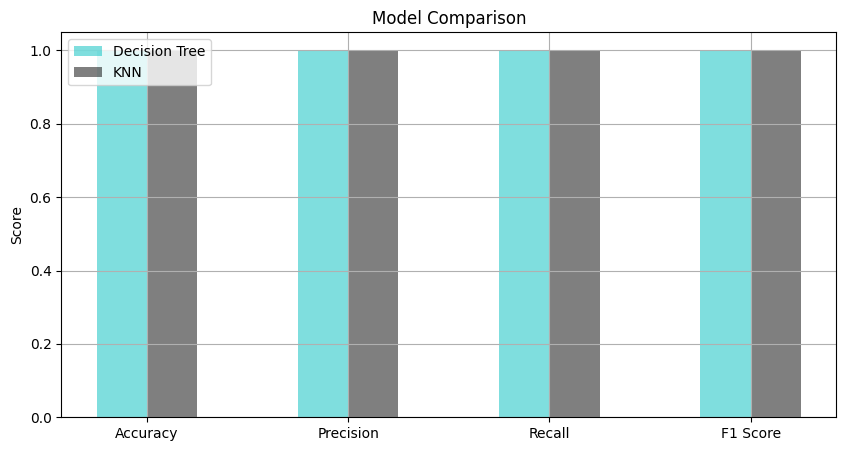

In [78]:
# set plot parameters
pos = list(range(len(dt_scores)))
width = 0.25

# plot
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(pos, dt_scores, width, alpha=0.5, color='c', label='Decision tree')
plt.bar([p + width for p in pos], knn_scores, width, alpha=0.5, color='k', label='KNN')

# better plot
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(metrics)
plt.legend(['Decision Tree', 'KNN'], loc='upper left')
plt.grid()

plt.show()

In [79]:
# create a dictionary
metrics_data = {
    'model': ['Decision tree', 'KNN'],
    'accuracy': [accuracy_dt, accuracy_knn],
    'precision': [precision_dt, precision_knn],
    'recall': [recall_dt, recall_knn],
    'f1 score': [f1_dt, f1_knn]
}

# create the dataframe
metrics_df = pd.DataFrame(metrics_data)

In [80]:
metrics_df

,model,accuracy,precision,recall,f1 score
0,Decision tree,0.997713,0.997712,0.997715,0.997713
1,KNN,0.999484,0.999486,0.999482,0.999484


### Confusion matrix

In [81]:
# confusion matrix for dt and knn
cm_dt = confusion_matrix(y_test, predictions_dt)
cm_knn = confusion_matrix(y_test, predictions_knn)

Text(0.5, 1.0, 'confusion matrix for decision tree')

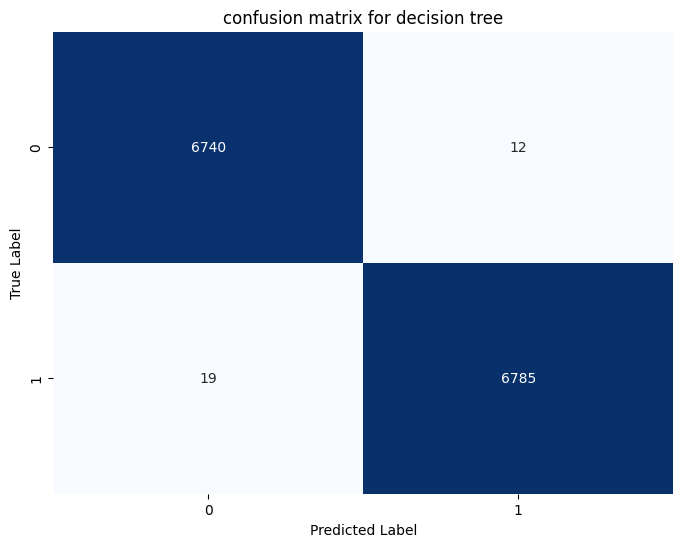

In [82]:
# plot cm for dt
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('confusion matrix for decision tree')

Text(0.5, 1.0, 'confusion matrix for knn')

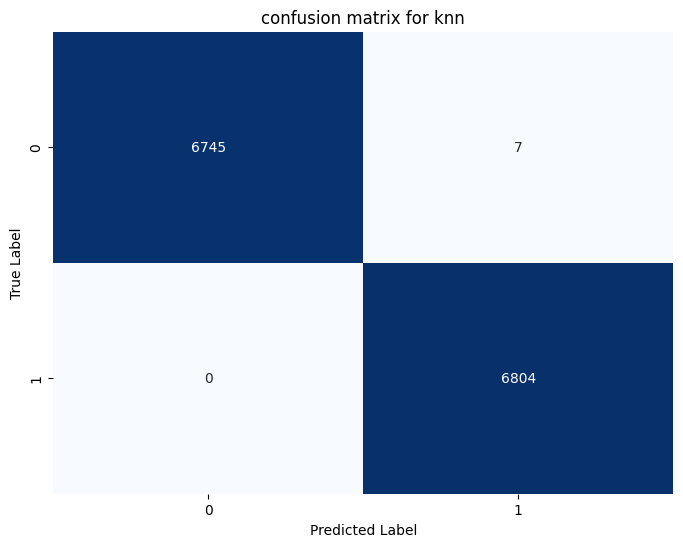

In [83]:
# plot cm for knn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('confusion matrix for knn')

### Plot decision tree

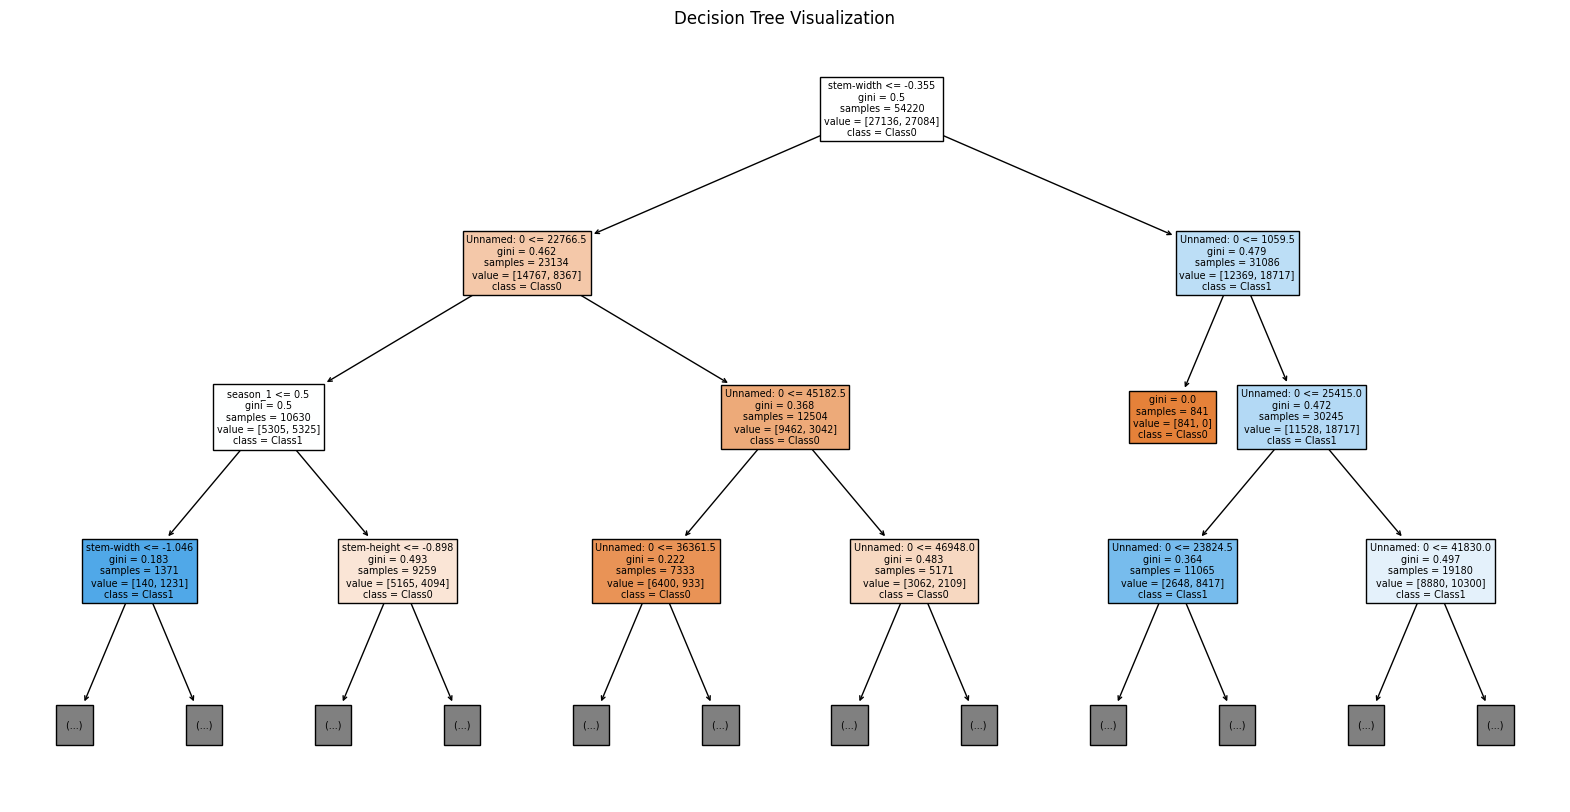

In [84]:
# using plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Class0', 'Class1'], max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

In [85]:
# using export_graphviz
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=['Class0', 'Class1'],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'